# Setup

In [1]:
!git clone https://github.com/ElNahrawy/ADAS.git

Cloning into 'ADAS'...
remote: Enumerating objects: 77, done.
remote: Total 77 (delta 0), reused 0 (delta 0), pack-reused 77
Unpacking objects: 100% (77/77), done.


In [3]:
!mkdir /content/ADAS/weights

In [7]:
%cd /content/ADAS/weights

/content/ADAS/weights


In [10]:
!gdown 1i_K86ZWAvmKYdUGwIAtiX3soDpMorxvT 
!gdown 1HnaiuD9PhrQwk_wXQO8zLeYEaX3Rvqw2 
!gdown 13bHboRFFeJ6hCJZEHmzLyCelIUuAB14B 
!gdown 1Ay5_Oh-8eZWZrfYG91bCmD37vwoyJkk- 

Downloading...
From: https://drive.google.com/uc?id=1i_K86ZWAvmKYdUGwIAtiX3soDpMorxvT
To: /content/ADAS/weights/Model_epoch_45-val_loss_0.04189-train_loss_0.03290.hdf5
100% 686M/686M [00:02<00:00, 265MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HnaiuD9PhrQwk_wXQO8zLeYEaX3Rvqw2
To: /content/ADAS/weights/Model_epoch_81-val_loss_0.05291-train_loss_0.04670.hdf5
100% 886M/886M [00:04<00:00, 189MB/s]
Downloading...
From: https://drive.google.com/uc?id=13bHboRFFeJ6hCJZEHmzLyCelIUuAB14B
To: /content/ADAS/weights/yolov4.weights
100% 211M/211M [00:00<00:00, 268MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ay5_Oh-8eZWZrfYG91bCmD37vwoyJkk-
To: /content/ADAS/weights/yolov4-tiny.weights
100% 24.3M/24.3M [00:00<00:00, 305MB/s]


In [11]:
%cd /content/ADAS

/content/ADAS


# Upload Images

In [12]:
from google.colab import files
uploaded = files.upload()

Saving 7.png to 7.png


# Inference

In [30]:
from MainClass import MainClass
import matplotlib.pyplot as plt

main = MainClass(max_depth = 10,
                 use_ROI = False,
                 threshold = 3.5,
                 tiny_yolo = False,
                 yolo_size = 512,
                 depth_model = 'DenseDepth')
main.image_inference(source = 'dir', image_dir = next(iter(uploaded)), scaling_factor = 0.8)
out = main.visualize(store_image = True, apply_on_depth = False, scaling_factor = 0.8, show_image=False, return_image=True)
depth = main.visualize(store_image = False, apply_on_depth = True, scaling_factor = 0.8, show_image=False, return_image=True)



# Results

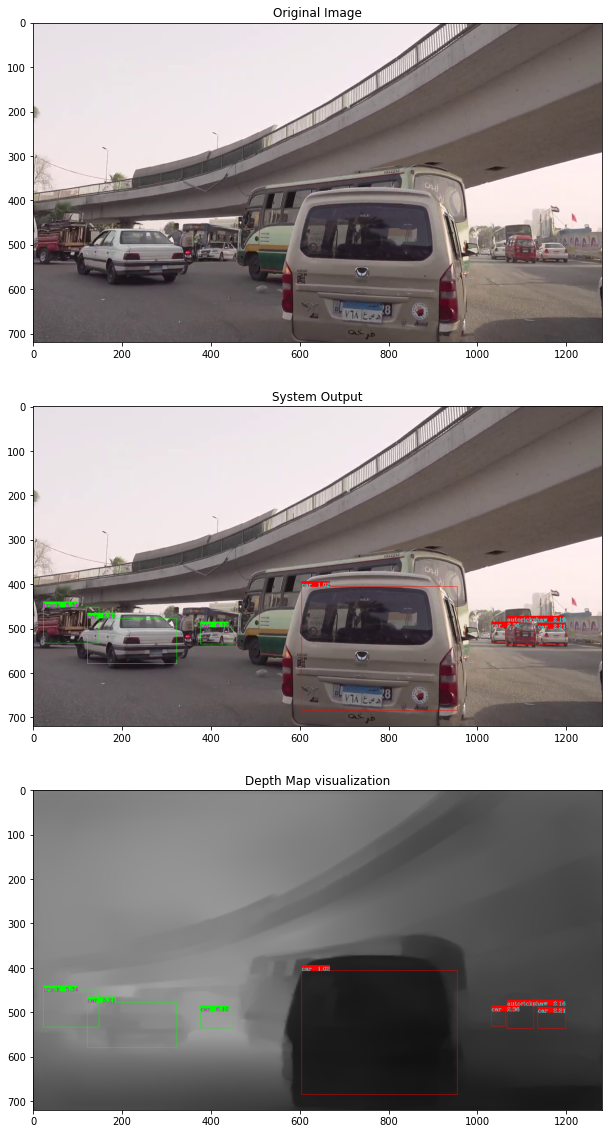

In [31]:
fig, axs = plt.subplots(3)
fig.set_size_inches(15,20)
axs[0].title.set_text('Original Image')
axs[1].title.set_text('System Output')
axs[2].title.set_text('Depth Map visualization')
axs[0].imshow(plt.imread(next(iter(uploaded))))
axs[1].imshow(out)
axs[2].imshow(depth)
plt.show()